# HiFormer

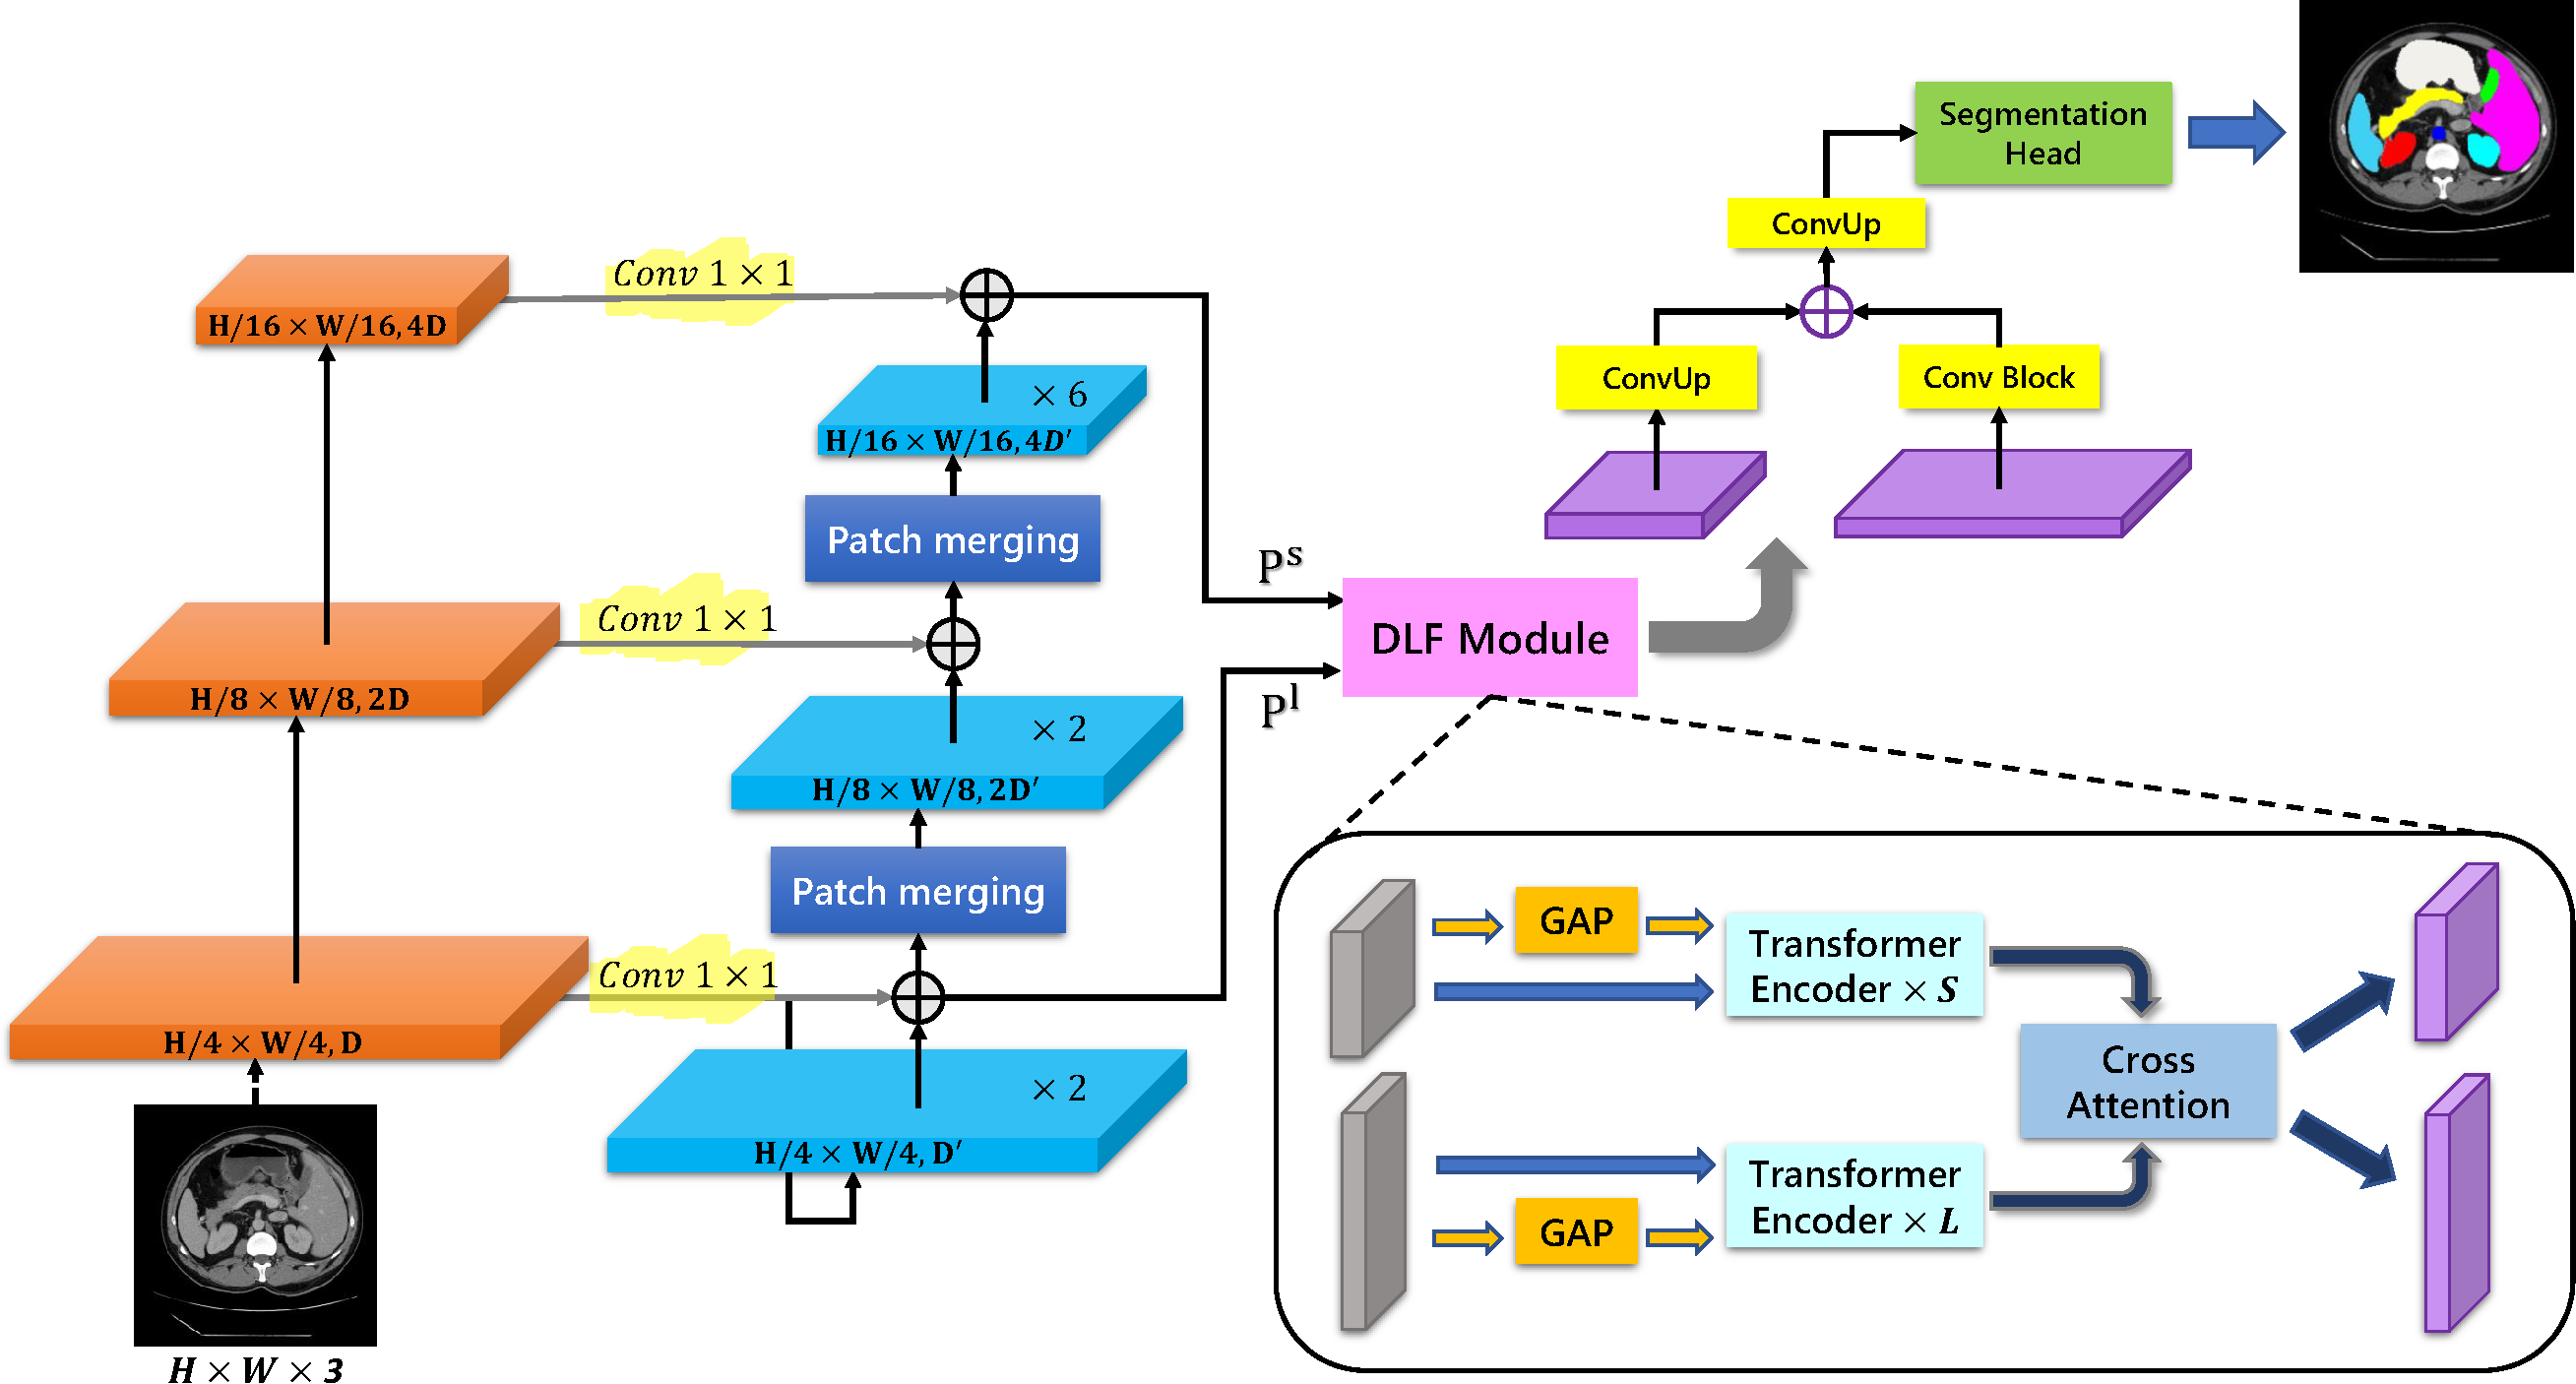

## 1) Download the Synapse Dataset


- Access to the synapse multi-organ dataset:

    Sign up in the official Synapse website and download the dataset. Convert them to numpy format, clip the images within [-125, 275], normalize each 3D image to [0, 1], and extract 2D slices from 3D volume for training cases while keeping the 3D volume in h5 format for testing cases.
    
    
- The directory structure of the dataset is as follows:

```bash
.
|
└── data
    └──Synapse
        ├── test_vol_h5
        │   ├── case0001.npy.h5
        │   └── *.npy.h5
        └── train_npz
            ├── case0005_slice000.npz
            └── *.npz
```

## 2) Install Prerequisites

In [ ]:
!pip install -r requirements.txt

## 3) Train Code
Run the below code to train HiFormer on the synapse dataset.

- **--root_path**     [path to the train data]
- **--test_path**     [path to the test data]
- **--batch_size**    [10 works for NVIDIA RTX 3090]
- **--eval_interval** [evaluation epoch]
- **--max_epochs**    [number of epochs to train, default: 400]
- **--model_name**    [choose from [hiformer-s, hiformer-b, hiformer-l]]
- **--num_workers**   [number of workers]

The results will be saved in the './results' folder.

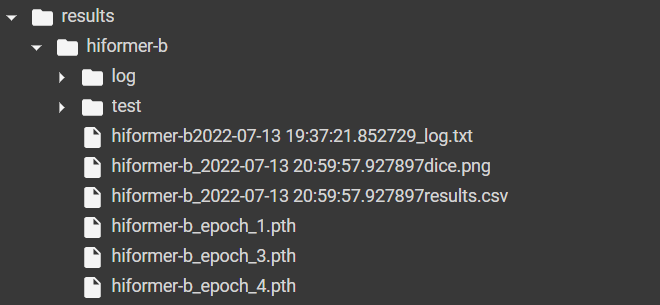

1. The **log** folder contains tensorboardx output that includes output images and loss changes graph.
2. The **test** folder contains output Nifti images.
3. Training logs are saved in the **hiformer*.txt** file.
4. The evaluation dice changes graph is shown in the **hiformer*.png**. 
5. The overall HD and Dice of the model for each evaluation are saved in the **hiformer*.csv** file.
6. **hiformer*.pth** is the saved model.

In [ ]:
!python train.py --root_path ./data/Synapse/train_npz --test_path ./data/Synapse/test_vol_h5 --batch_size 10 --eval_interval 20 --max_epochs 400 --model_name hiformer-b --num_workers 2

## 3) Test Code

Run the below code to test HiFormer on the synapse dataset.

- **--test_path**     [path to the test data]
- **--model_name**    [choose from [hiformer-s, hiformer-b, hiformer-l]]
- **--is_savenii**    [whether to save results during inference]
- **--model_weight**  [HiFormer trained model path]

The test results will be saved in the './predictions' folder.

In [ ]:
!python test.py --test_path ./data/Synapse/test_vol_h5 --model_name hiformer-b --is_savenii --model_weight './results/hiformer-b/hiformer-b_epoch_400.pth'